In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's load the Iris dataset using Seaborn
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

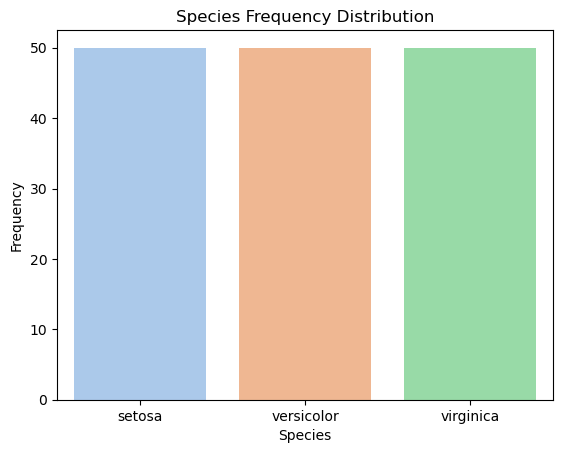

In [8]:
sns.countplot(data = df, x = "species", palette = "pastel");
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.title("Species Frequency Distribution")
plt.show()

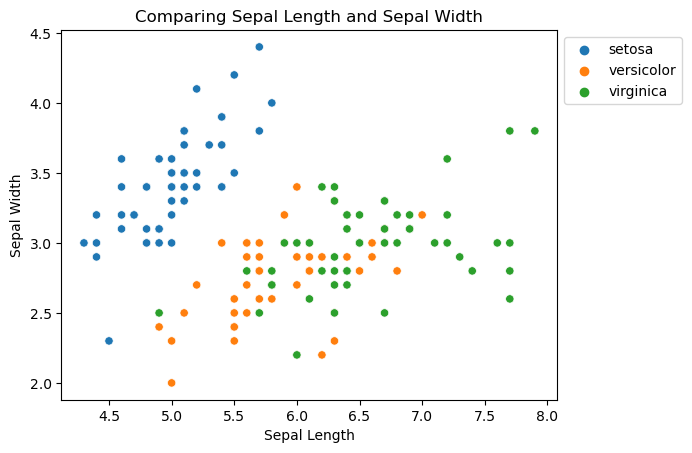

In [9]:
sns.scatterplot(data = df, x = "sepal_length", y = "sepal_width", hue = "species");
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Comparing Sepal Length and Sepal Width")
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()

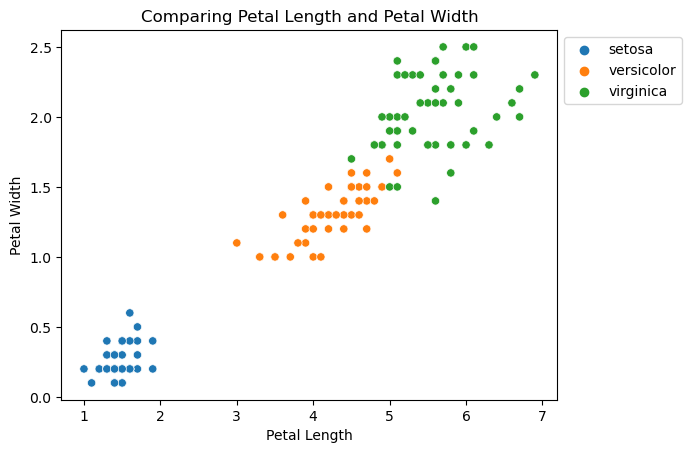

In [10]:
sns.scatterplot(data = df, x = "petal_length", y = "petal_width", hue = "species");
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Comparing Petal Length and Petal Width")
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()

C:\Users\bilge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bilge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bilge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bilge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

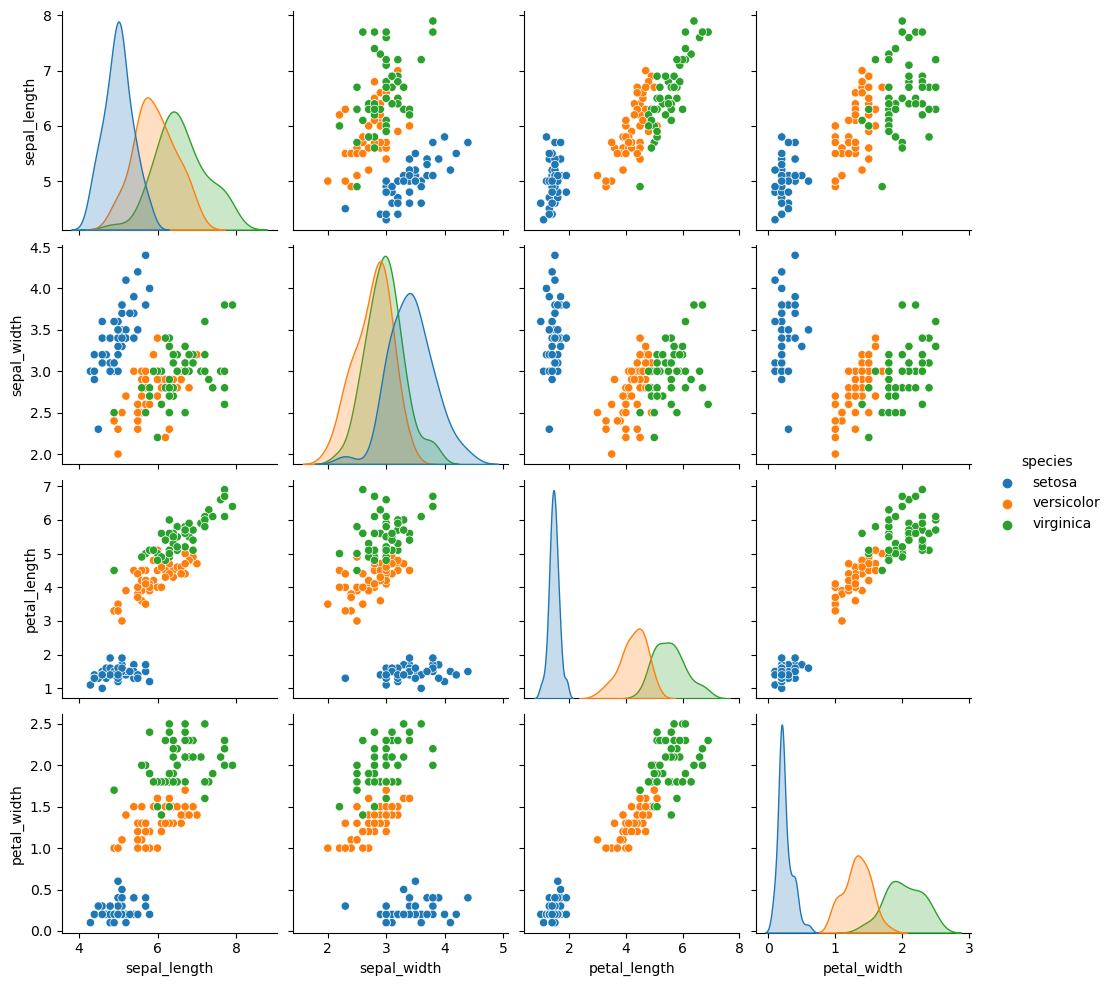

In [11]:
sns.pairplot(data = df, hue = "species");

In [13]:
numeric_col = df.drop(columns = ["species"])
numeric_col.corr(method="pearson")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Result : 

- There is a strong positive correlation between sepal_length and petal_length. This indicates that as sepal_length increases, petal_length also tends to increase. (0.871)
- There is a strong positive correlation between sepal_length and petal_width. This indicates that as sepal_length increases, petal_width also tends to increase. (0.817)
- There is a strong positive correlation between petal_length and petal_width. This indicates that as petal_length increases, petal_width also tends to increase. (0.962)
- There is a moderate negative correlation between sepal_width and petal_length. This indicates that as sepal_width increases, petal_length tends to decrease. (-0.428)

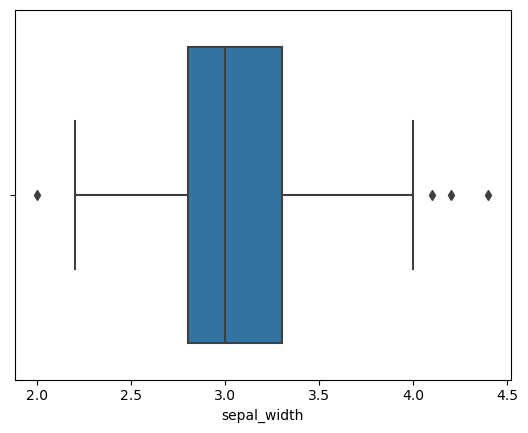

In [14]:
sns.boxplot(data = df, x = "sepal_width");

Result : From the graph, values greater than 4 and less than 2 are seen as outliers.

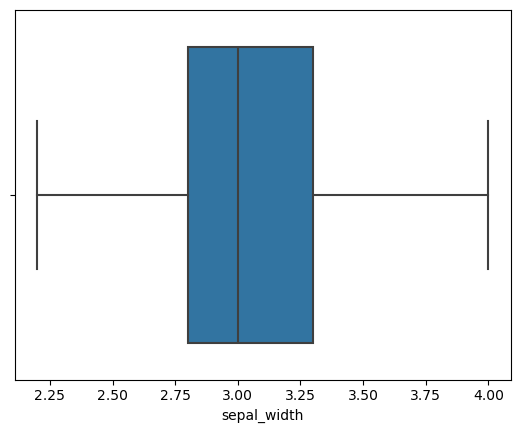

In [15]:
#Let's detect and remove the outliers usinG IQR.
Q1 = np.percentile(df["sepal_width"], 25)
Q3 = np.percentile(df["sepal_width"], 75)
IQR = Q3 - Q1

upper = np.where(df["sepal_width"] >= (Q3 + 1.5*IQR))
lower = np.where(df["sepal_width"] < (Q1 - 1.5*IQR))

df.drop(upper[0], inplace= True)
df.drop(lower[0], inplace = True)

sns.boxplot(data = df, x = "sepal_width");

In [16]:
df.shape

(146, 5)